In [1]:
from utils.preprocessing import Preprocessor
from utils.utils import create_split
import xgboost as xgb
import pandas as pd
from Validation.Validation import doFullValidation
import os

In [21]:
# Load and split data

# TODO: automatically create or load depending if pkl format exists
# Add output pickle file to data folder

def getPickleFile(directory_path):
    files = os.listdir(directory_path)
    for file in files:
        if file.endswith(".pkl"):
            return file
    return False


path = "data/SamplesV2/CloseByPion/histo"
file = getPickleFile(path)
if file:
    print("%s exists. Load File"%file)
    d = Preprocessor.loadNtuple(os.path.join(path,file))
else:
    file = "Ntuple.pkl"
    print("%s doesn't exist. Create File"%file)
    preprocessor = Preprocessor(path)
    preprocessor.saveToPickle(os.path.join(path,file))
    d = Preprocessor.loadNtuple(os.path.join(path,file))
X_train, y_train, X_test, y_test = create_split(d)

Ntuple.pkl exists. Load File


In [22]:
X_test

,tkx_energy,tkx_numtkx,weighted_bar_x,weighted_bar_y,weighted_bar_z,cee_120,cee_200,cee_300,ceh_120,ceh_200,ceh_300,ceh_scint
59460,132.970627,3,26.585810,53.278866,381.799225,0.002069,0.000000,0.000000,0.963337,0.001453,0.033142,0.0
78945,88.149170,2,16.209162,-69.955544,428.530060,0.000000,0.000000,0.000000,0.023158,0.315774,0.661068,0.0
17970,243.207184,2,-94.593224,22.711720,370.874542,0.000000,0.279442,0.000000,0.000000,0.320118,0.400440,0.0
15993,368.594879,4,-81.861732,-61.585419,379.545319,0.000000,0.000814,0.056564,0.000000,0.237960,0.704661,0.0
20510,82.610580,1,-95.391090,45.893749,359.909363,0.000000,0.651837,0.149835,0.000000,0.000000,0.198328,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53689,443.853790,2,9.017973,72.270241,346.556885,0.954006,0.000000,0.000000,0.022791,0.003346,0.019856,0.0
81326,2.999509,1,16.318327,163.051712,383.416626,0.000000,0.000000,0.072914,0.000000,0.000000,0.927086,0.0
54136,305.733398,2,-30.145098,-33.906189,352.814056,0.709440,0.000000,0.000000,0.271753,0.018807,0.000000,0.0
46072,83.867271,2,0.034937,-52.828896,392.274109,0.183928,0.000000,0.000000,0.659675,0.028219,0.128177,0.0


In [23]:
X_train

,tkx_energy,tkx_numtkx,weighted_bar_x,weighted_bar_y,weighted_bar_z,cee_120,cee_200,cee_300,ceh_120,ceh_200,ceh_300,ceh_scint
48736,225.232483,3,2.154862,42.840343,345.572968,0.831703,0.0,0.0,0.168297,0.000000,0.000000,0.0
24897,426.537781,4,-59.168983,12.306616,351.710541,0.915423,0.0,0.0,0.081507,0.003070,0.000000,0.0
77642,88.700302,1,-40.281872,43.245132,378.569397,0.229650,0.0,0.0,0.714937,0.055414,0.000000,0.0
20349,205.598175,1,-0.830491,-78.499794,417.343872,0.187740,0.0,0.0,0.384658,0.006453,0.421148,0.0
45193,120.935661,1,29.453182,-46.023224,414.784302,0.000000,0.0,0.0,0.462093,0.537907,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51062,360.782562,3,-28.688229,46.271496,364.646667,0.729474,0.0,0.0,0.227854,0.017813,0.024859,0.0
60193,3.715455,1,67.898590,50.676411,402.592621,0.026049,0.0,0.0,0.147607,0.142037,0.684307,0.0
3722,169.352570,1,60.004906,15.948577,355.956024,0.803507,0.0,0.0,0.152284,0.011261,0.032948,0.0
54486,94.691864,1,-47.938736,12.517912,385.288513,0.073910,0.0,0.0,0.859246,0.066844,0.000000,0.0


In [24]:
# Hyperparameter Search

# TODO: optional
regressor=xgb.XGBRegressor(eval_metric='rmsle')
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
#search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

#print("The best hyperparameters are ",search.best_params_)

In [25]:
# Create Model

#  TODO: store externally
settings = {"learning_rate":0.005,
           "n_estimators":1700,
           "max_depth":3,
           "eval_metric":'rmse'}

regressor=xgb.XGBRegressor(learning_rate = settings["learning_rate"],
                           n_estimators  = settings["n_estimators"],
                           max_depth     = settings["max_depth"],
                           eval_metric = settings["eval_metric"])

In [26]:
# Train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
# Predict
predictions = regressor.predict(X_test)

In [28]:
y_test

59460    197.464874
78945    180.641235
17970    344.591431
15993    564.644043
20510    136.877853
            ...    
53689    554.002991
81326    520.749817
54136    528.400391
46072    187.773987
33456    121.783699
Name: cp_energy, Length: 18756, dtype: float64

Directory 'plots/XGBoost/v2/' already exists.


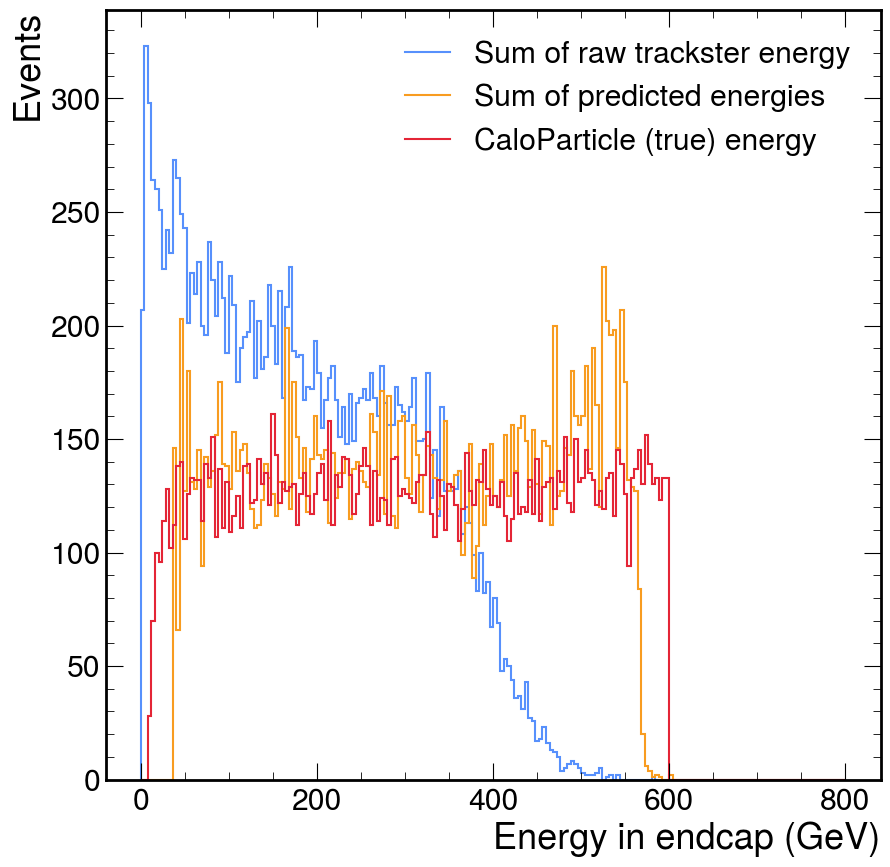

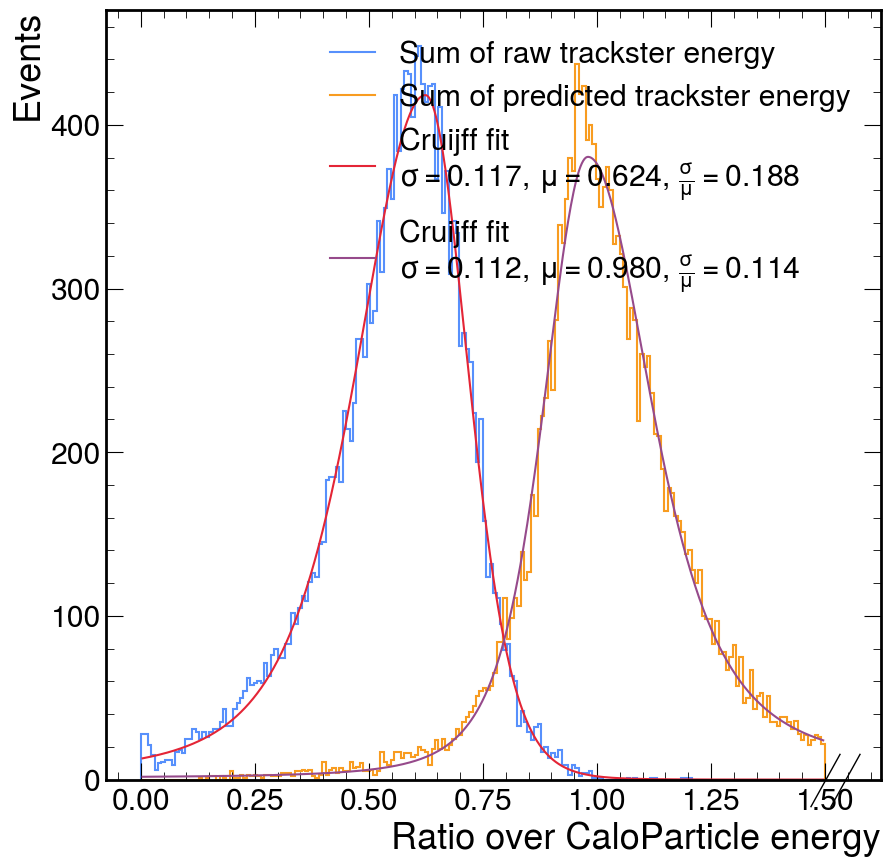

In [29]:
# Validation

#TODO: sensible output

def create_directory_if_not_exists(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # Create the directory if it doesn't exist
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

path="plots/XGBoost/v2/"
create_directory_if_not_exists(path)
doFullValidation(X_test, y_test, predictions,path)